In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# 자연어처리

In [2]:
#!pip install nltk==3.4
#nltk.download()

In [3]:
import nltk
from nltk.corpus import stopwords

from konlpy.tag import Okt  
okt=Okt()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bf = pd.read_csv('/Users/beenyu/project_women_pop/bf2018.csv')
af = pd.read_csv('/Users/beenyu/project_women_pop/af2018.csv')

In [5]:
bf_lyrics = bf['Lyric'].tolist() 
af_lyrics = af['Lyric'].tolist()
#분명 있는데.. 왜 잡지를 못하는거니?

In [6]:
for i in range(len(bf_lyrics)):
    bf_lyrics[i] = str(bf_lyrics[i])
for i in range(len(af_lyrics)):
    af_lyrics[i] = str(af_lyrics[i])

In [7]:
#” “.join( list ) : 리스트에서 문자열으로
bf_lyrics = ''.join(bf_lyrics)
af_lyrics = ''.join(af_lyrics)

bf_sample = okt.pos(bf_lyrics, norm=True)
af_sample = okt.pos(af_lyrics, norm=True)

In [8]:
if 'Dumb' in bf_sample:
    print('True')
else:
    print('Wrong')

Wrong


In [9]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', 'la', 'dumb', 'yeah', 'oh'] 
add_list = ['눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

bf_word_cleaned = []
for word in bf_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            bf_word_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                bf_word_cleaned.append(word[0].lower())

In [10]:
bf_word_dic = {}

for word in bf_word_cleaned:
    if word not in bf_word_dic:
        bf_word_dic[word] = 1 # changed from "0" to "1"
    else:
        bf_word_dic[word] += 1
        
# af_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

In [11]:
# for i in w_word_dic:
#     print(i)

In [12]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', 'La', 'Dumb', 'yeah', 'oh'] 
add_list = ['눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

af_word_cleaned = []
for word in af_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            af_word_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                af_word_cleaned.append(word[0].lower())

In [13]:
af_word_dic = {}

for word in af_word_cleaned:
    if word not in af_word_dic:
        af_word_dic[word] = 1 # changed from "0" to "1"
    else:
        af_word_dic[word] += 1

# af_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

### 워드클라우드

In [14]:
word_cloud = WordCloud(font_path="/Library/Fonts/AppleGothic.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white',
                       max_words =100)

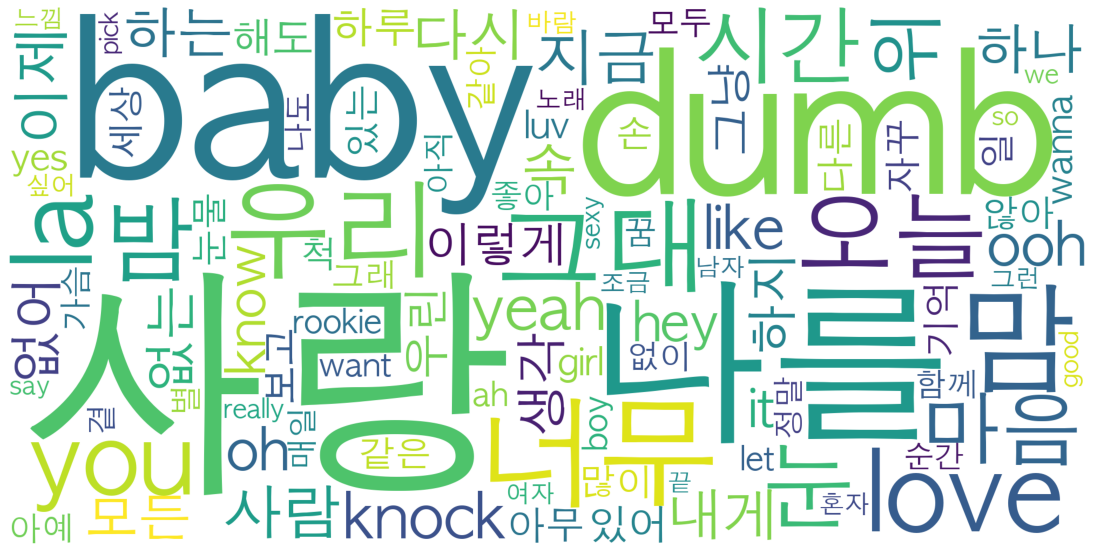

In [15]:
word_cloud.generate_from_frequencies(bf_word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

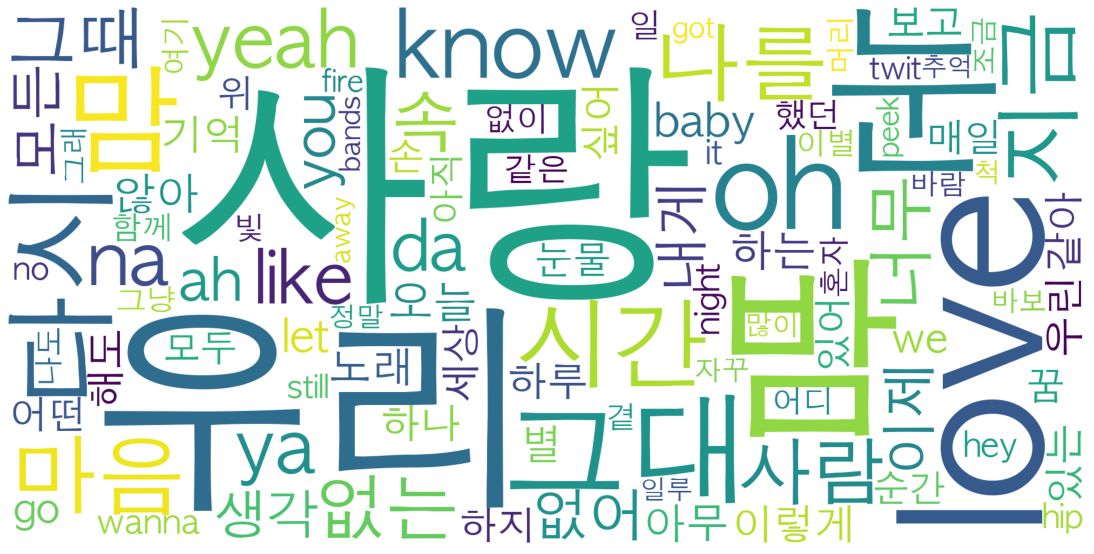

In [16]:
word_cloud.generate_from_frequencies(af_word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()